In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Load in monthly data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0])
        temp.append(fulllines[2])
        co2.append(fulllines[1])
        sea_ice_ext.append(fulllines[4])
        pH.append(fulllines[5].replace("\n", ""))

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)


#convert data entries from strings to floats
times = [float(string) for string in time]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [3]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [4]:
# load in interpolated pH data
with open ('org_data/pHData.txt', 'r') as file3:
    lines3 = file3.readlines()
    time_int = []
    ph_int = []
    for i in lines3:
        fulllines=i.split('\t')
        time_int.append(fulllines[0])
        ph_int.append(fulllines[1])


time_int = [float(string) for string in time_int]
ph_int = [float(string) for string in ph_int]

# load in interpolated yearly pH data
with open ('org_data/pHDataAnnual.txt', 'r') as file4:
    lines4 = file4.readlines()
    time_y_int = []
    ph_y_int = []
    for i in lines4:
        fulllines=i.split('\t')
        time_y_int.append(fulllines[0])
        ph_y_int.append(fulllines[1])


times_y_int = [float(string) for string in time_y_int]
phs_y_int = [float(string) for string in ph_y_int]


In [5]:
#convert data to np arrays to use polyfit
times_np = np.array(times)
time_int_np = np.array(time_int)
co2_np = np.array(co2s)
temp_np = np.array(temps)
sea_ice_ext_np = np.array(sea_ice_exts)
ph_np = np.array(ph_int)

In [6]:
#normalize the datasets to compare the trends
co2_max = max(co2_np)
co2n_np = (co2_np)/co2_max

temp_max = max(temp_np)
tempn_np = (temp_np)/temp_max

ice_max = max(sea_ice_ext_np)
icen_np = (sea_ice_ext_np)/ice_max

ph_max = max(ph_np)
phn_np = (ph_np)/ph_max

In [8]:
a, b = np.polyfit(times_np, co2n_np, 1)
a2, b2 = np.polyfit(times_np[-180:],co2n_np[-180:], 1)
a3, b3 = np.polyfit(times_np[:180],co2n_np[:180], 1)

a_temp, b_temp = np.polyfit(times_np, tempn_np, 1) #all time
a2_temp, b2_temp = np.polyfit(times_np[-180:],tempn_np[-180:], 1) #recent data
a3_temp, b3_temp = np.polyfit(times_np[:180],tempn_np[:180], 1) #past data

a_ice, b_ice = np.polyfit(times_np, icen_np, 1)
a2_ice, b2_ice = np.polyfit(times_np[340:-12],icen_np[340:-12], 1)
a3_ice, b3_ice = np.polyfit(times_np[:180],icen_np[:180], 1)

a_ph, b_ph = np.polyfit(time_int_np, phn_np, 1)
a2_ph, b2_ph = np.polyfit(time_int_np[-120:],phn_np[-120:], 1)
a3_ph, b3_ph = np.polyfit(time_int_np[:120],phn_np[:120], 1)


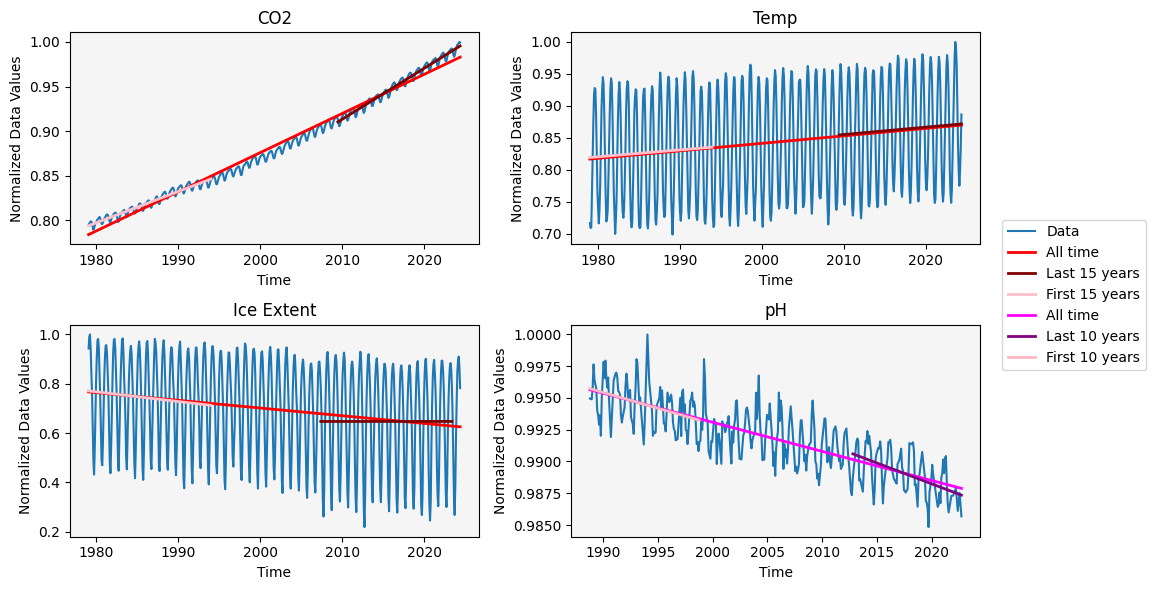

<Figure size 2000x1200 with 0 Axes>

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
plt.figure(figsize=(20,12))
axs[0, 0].plot(times,co2n_np, label = 'Data')
axs[0, 0].plot(times,a*times_np+b, color='red', linewidth = 2, label='All time')
axs[0, 0].plot(times[-180:],a2*times_np[-180:]+b2,color='maroon', linewidth = 2, label = 'Last 15 years')
axs[0, 0].plot(times[:180],a3*times_np[:180]+b3,color='pink', linewidth = 2, label = 'First 15 years')
axs[0, 0].set_title('CO2')
axs[0, 0].set_facecolor('whitesmoke')
#axs[0, 0].legend()

axs[0, 1].plot(times,tempn_np)
axs[0, 1].plot(times,a_temp*times_np+b_temp, color='red', linewidth = 2)
axs[0, 1].plot(times[-180:],a2_temp*times_np[-180:]+b2_temp,color='maroon', linewidth = 2)
axs[0, 1].plot(times[:180],a3_temp*times_np[:180]+b3_temp,color='pink', linewidth = 2)
axs[0, 1].set_title('Temp')
axs[0, 1].set_facecolor('whitesmoke')

axs[1, 0].plot(times,icen_np)
axs[1, 0].plot(times,a_ice*times_np+b_ice, color='red', linewidth = 2)
axs[1, 0].plot(times[340:-12],a2_ice*times_np[340:-12]+b2_ice,color='maroon', linewidth = 2)
axs[1, 0].plot(times[:180],a3_ice*times_np[:180]+b3_ice,color='pink', linewidth = 2)
axs[1, 0].set_title('Ice Extent')
axs[1, 0].set_facecolor('whitesmoke')

axs[1, 1].plot(time_int,phn_np)
axs[1, 1].plot(time_int,a_ph*time_int_np+b_ph, color='magenta', label='All time', linewidth = 2)
axs[1, 1].plot(time_int[-120:],a2_ph*time_int_np[-120:]+b2_ph,color='purple', label = 'Last 10 years', linewidth = 2)
axs[1, 1].plot(time_int[:120],a3_ph*time_int_np[:120]+b3_ph,color='lightpink', label = 'First 10 years', linewidth = 2)
axs[1, 1].set_title('pH')
axs[1, 1].set_facecolor('whitesmoke')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Normalized Data Values')


fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.savefig('images/trends.pdf', dpi=300, bbox_inches='tight')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [10]:
#add slopes of all trend lines to a list
slopes = []
slopes.append(a)
slopes.append(a2)
slopes.append(a3)
slopes.append(a_temp)
slopes.append(a2_temp)
slopes.append(a3_temp)
slopes.append(a_ice)
slopes.append(a2_ice)
slopes.append(a3_ice)
slopes.append(a_ph)
slopes.append(a2_ph)
slopes.append(a3_ph)